In [1]:
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import rdForceFieldHelpers, rdMolAlign
from rdkit.Chem.Draw import IPythonConsole

from molclub import conf_gen, mmff

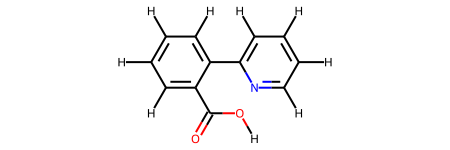

2

In [21]:
smi = "OC(=O)C1=CC=CC=C1C1=CC=CC=N1"
mol = Chem.MolFromSmiles(smi)
# mol = Chem.MolFromSmiles('CCOCC')
mol = Chem.AddHs(mol)
display(mol)

mols, energies = conf_gen.rdkit_conf_gen(mol)
len(mols)

In [12]:
mol = Chem.MolFromSmiles('CN1C(=O)C2=C(N(N=C2N3C1=NC4C3CCC4)CC5=CC=C(C=C5)C6=NC(=CC=C6)F)NC7=CC=CC=C7')
mols = conf_gen.etkdg(
    mol,
)
print(len(mols))

mols = conf_gen.prune(
    mols,
    None,
    1
)
print(len(mols))

200
2
